In [21]:
import numpy as np
import math

In [22]:
class Neuron:
    def __init__(self,i,j):
        self.i = i
        self.j = j
        self.weights = None #равномерное распределение
        
    def set_weights(self,flag,N = 0, w = None):
        if (flag == True):
            self.weights = self._normalization(np.random.uniform(-0.5, 0.5, N))
        else:
            self.weights = w
    def _normalization(self,mass):
        length = ((mass**2).sum())**0.5
        mass = mass/length
        return mass

    
class SOM:
    def __init__(self,h_map,w_map,input_N,T,sigma=2.24):
        self.h_map = h_map
        self.w_map = w_map
        self.input_N = input_N
        self.map_neurons = self._create_neurons_map(h_map,w_map,input_N)
        self.win_neuron = None
        self.sigma = sigma
        self.T = T
             
    def _create_neurons_map(self,h_map,w_map,input_N):
        """Создание карты Кохонена"""
        map_n = [[0 for x in range(w_map)] for y in range(h_map)]
        for i in range(h_map):
            for j in range(w_map):
                map_n[i][j]=Neuron(i,j)
                map_n[i][j].set_weights(N = input_N,flag = True)
        return map_n
        
    def _get_learning_rate(self,t):
        """Скорость обучения"""
        return 0.5**(t/self.T)
    
    def _get_distanse(self,W,X):
        """Растояние"""
        return (sum((W-X)**2))**0.5
        
    def _winner_neuron(self,X):
        """Запопинаем нейрон победитель"""
        win_neuron = self.map_neurons[0][0]
        d_min = self._get_distanse(win_neuron.weights,X)
        i_min,j_min = 0,0
        
        for i in range(self.h_map):
            for j in range(1,self.w_map):
                d = self._get_distanse(self.map_neurons[i][j].weights,X)
                if(d<d_min):
                    d_min = d
                    i_min = i
                    j_min = j
                    win_neuron = self.map_neurons[i][j]
        self.win_neuron = Neuron(i_min,j_min)
        self.win_neuron.set_weights(flag = False, w = win_neuron.weights.copy())
        #print("i_min, j_min",i_min, j_min)
        return i_min, j_min
    
    def _tuning_weights_of_neurons(self,X, t):
        """Настройка весов"""
        for i in range(self.h_map):
            for j in range(self.w_map):
                W = self.map_neurons[i][j].weights.copy()
                g = self._get_learning_rate(t)  *  self._neighborhood_function(t,i,j)
                self.map_neurons[i][j].weights = W + g*(X-W)
                
    def _get_sigma(self,t):
        """Сигма"""
        return self.sigma / (1 + t/self.T)
    
    def _neighborhood_function(self,t,i,j):
        """Функция соседства (сила связи между нейронами)"""
        arr = np.array([i,j])
        arr2 = np.array([self.win_neuron.i,self.win_neuron.j])
        d = self._get_distanse(arr,arr2)
               
        b = 1/(2*self._get_sigma(t)**2)
        return np.exp( (-1)*b*(d**2))
        
    def _normalization(self,mass):
        """Нормализация вектора"""
        length = ((mass**2).sum())**0.5
        mass = mass/length
        return mass
        
    def fit(self,train_data):
        """Обучение"""
        t = 0
        train_data = self._normalization(train_data)
        
        for ep in range(self.T):
            train_copy = train_data.copy() 
            while train_copy.shape[0]:
                random_index = int(np.random.choice(np.arange(train_copy.shape[0])))
                self._winner_neuron(train_copy[random_index])
                self._tuning_weights_of_neurons(train_copy[random_index], t)
                
                train_copy = np.delete(train_copy, (random_index), axis=0) 
            t+=1
    def predict(self,test_data):
        """Предсказание"""
        map_result = [["" for x in range(self.w_map)] for y in range(self.h_map)]
        for ind,el in enumerate(test_data):
            i,j = self._winner_neuron(el)
            #print(i,j)
            map_result[i][j] += ""+str(ind)+" "
        return map_result
            
#Нормализация входных данных
#Нормализвция весов
            
        
model = SOM(input_N = 29, h_map = 10, w_map = 10, T = 30)

In [28]:
train_data = [
    [1,0,0,  1,0,0,0,0,1,  0,0,1,0],
    [1,0,0,  1,0,0,0,0,1,  0,0,0,0],
    [1,0,0,  1,0,0,0,0,1,  0,0,0,1],
    [1,0,0,  1,0,0,0,0,1,  0,0,1,1],
    [1,0,0,  1,0,0,0,0,1,  1,0,1,0],
    [1,0,0,  1,0,0,0,0,1,  1,0,1,0],
    [0,1,0,  1,0,0,0,0,1,  1,0,1,0],
    [0,1,0,  0,1,1,0,0,0,  1,0,0,0],
    [0,1,0,  0,1,1,0,0,0,  0,1,0,0],
    [0,1,0,  0,1,1,0,1,0,  1,1,0,0],
    [1,0,0,  0,1,1,0,0,0,  1,0,0,0],
    [0,0,1,  0,1,1,0,0,0,  1,1,0,0],
    [0,0,1,  0,1,1,0,1,0,  1,1,0,0],
    [0,0,1,  0,1,1,1,1,0,  0,1,0,0],
    [0,0,1,  0,1,1,1,1,0,  0,1,0,0],
    [0,0,1,  0,1,1,1,0,0,  0,0,0,0]
]
y = ["Голубь","Курица","Утка","Гусь","Сова","Ястреб","Орел","Лиса","Собака","Волк","Кошка","Тигр","Лев","Лошадь","Зебра","Корова"]

a = 0.2
test_data = train_data.copy()
for i in range(len(test_data)):
    l = [0 for j in range(len(test_data[i]))]
    test_data[i] =[a if j==i else 0  for j in range(len(test_data))] + l
test_data = np.array(test_data)
print(test_data)


for i in range(len(train_data)):
    train_data[i] =[a if j==i else 0  for j in range(len(train_data))]+train_data[i]
train_data = np.array(train_data)




[[0.2 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.2 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.2 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.2 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.2 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.2 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.2 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.2 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.2 0.  0.  0.

In [29]:
model.fit(train_data)
map_res = model.predict(train_data)
print(map_res)

[['3 ', '2 ', '', '', '', '', '15 ', '', '', '13 '], ['', '', '', '', '', '', '', '', '', '14 '], ['', '', '1 ', '', '', '', '', '', '', ''], ['', '0 ', '', '', '', '', '', '', '', ''], ['', '', '', '', '', '', '', '11 ', '', '12 '], ['', '', '', '', '10 ', '', '', '', '', ''], ['', '', '', '', '', '', '', '', '', ''], ['', '4 5 ', '', '', '', '', '7 ', '', '', '9 '], ['', '', '', '', '', '', '', '', '', ''], ['', '', '', '6 ', '', '', '', '', '8 ', '']]


In [30]:
for i in range(len(map_res)):
    for j in range(len(map_res[0])):
        if(map_res[i][j] != ''):
            l =  map_res[i][j].rstrip().split(" ")
            map_res[i][j] = ""
            for u in range(len(l)):
                int_s = int(l[u])
                map_res[i][j] += y[int_s]
        else:
            map_res[i][j] = "   *   "
np.set_printoptions(linewidth = 150)
map_res = np.array(map_res)
print(map_res)

[['Гусь' 'Утка' '   *   ' '   *   ' '   *   ' '   *   ' 'Корова' '   *   ' '   *   ' 'Лошадь']
 ['   *   ' '   *   ' '   *   ' '   *   ' '   *   ' '   *   ' '   *   ' '   *   ' '   *   ' 'Зебра']
 ['   *   ' '   *   ' 'Курица' '   *   ' '   *   ' '   *   ' '   *   ' '   *   ' '   *   ' '   *   ']
 ['   *   ' 'Голубь' '   *   ' '   *   ' '   *   ' '   *   ' '   *   ' '   *   ' '   *   ' '   *   ']
 ['   *   ' '   *   ' '   *   ' '   *   ' '   *   ' '   *   ' '   *   ' 'Тигр' '   *   ' 'Лев']
 ['   *   ' '   *   ' '   *   ' '   *   ' 'Кошка' '   *   ' '   *   ' '   *   ' '   *   ' '   *   ']
 ['   *   ' '   *   ' '   *   ' '   *   ' '   *   ' '   *   ' '   *   ' '   *   ' '   *   ' '   *   ']
 ['   *   ' 'СоваЯстреб' '   *   ' '   *   ' '   *   ' '   *   ' 'Лиса' '   *   ' '   *   ' 'Волк']
 ['   *   ' '   *   ' '   *   ' '   *   ' '   *   ' '   *   ' '   *   ' '   *   ' '   *   ' '   *   ']
 ['   *   ' '   *   ' '   *   ' 'Орел' '   *   ' '   *   ' '   *   ' '   *   ' 'Собака' '   *   '

# Гипперпараметры карты Кохонена

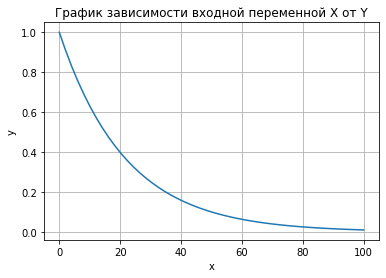

In [33]:
#Как уменьшается скорость обучения
#Показательный закон
import matplotlib.pyplot as plt
x = np.linspace(0,100)
y = 0.01 ** (x/100)

plt.title("График зависимости входной переменной X от Y") # заголовок
plt.plot(x,y) # построение графика
plt.xlabel("x") # ось абсцисс
plt.ylabel("y") # ось ординат
plt.grid()      # включение отображение сетки


0.09964923469387754 5.017600000000001


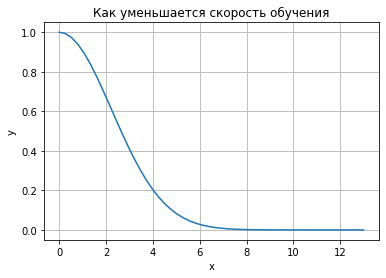

In [32]:
#Как уменьшается скорость обучения
#Показательный закон
import matplotlib.pyplot as plt
import math
x = np.linspace(0,13)
sigma = 2.24
b = 1/(2*sigma**2)
print(b,sigma**2)
y = np.exp( (-1)*b*(x**2)    )
plt.title("Как уменьшается скорость обучения") # заголовок
plt.plot(x,y) # построение графика
plt.xlabel("x") # ось абсцисс
plt.ylabel("y") # ось ординат
plt.grid()      # включение отображение сетки